In [1]:
from datetime import datetime
import pandas as pd
from geopy import distance
import numpy as np

import pymongo
from pymongo import MongoClient

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

In [2]:
client = MongoClient('localhost', 27017)

db = client['avl_pipeline_test']
trip_coll = db['trips']
edge_coll = db['edges_standardized']

In [8]:
projection = {
    "_id": 0,
    "trip_duration": 1
}
durations = trip_coll.find({}, projection)

In [9]:
duration_lst = [item['trip_duration'] for item in list(durations)]

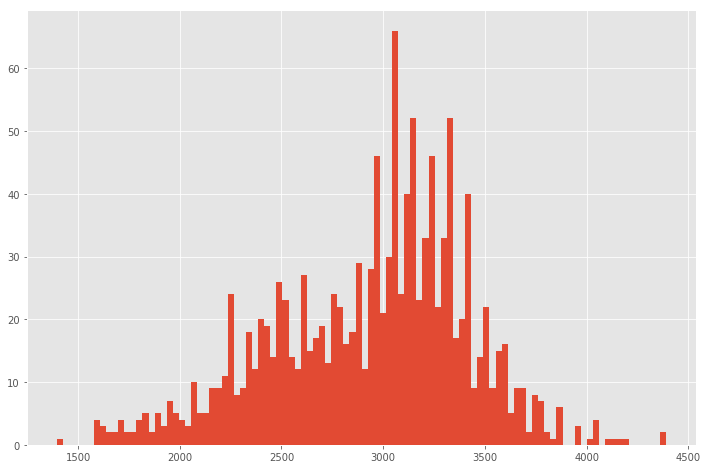

In [13]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(duration_lst, bins=100);

All edges

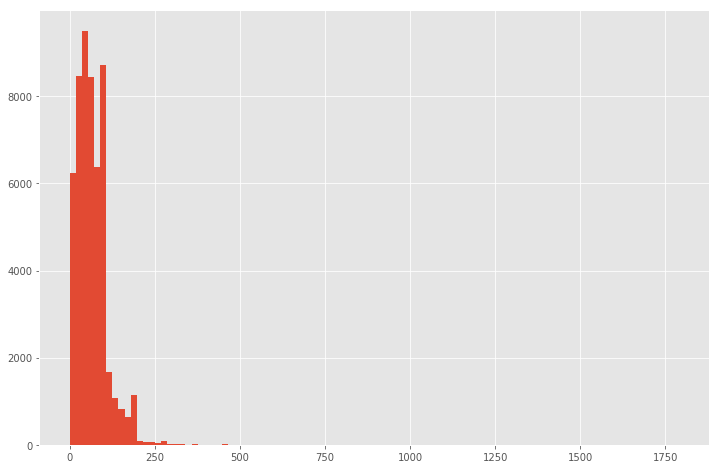

In [28]:
projection = {
    "_id": 0,
    "standard_edge": 1
}
durations = edge_coll.find({}, projection)
duration_lst = [item['standard_edge'] for item in list(durations)]

fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(duration_lst, bins=100);

Yikes! There's a 1789 second edges in there (30 minutes between two stops!)

---

What about 'reasonable' edges (more than 0 seconds, less that 600 seconds (10 minutes))

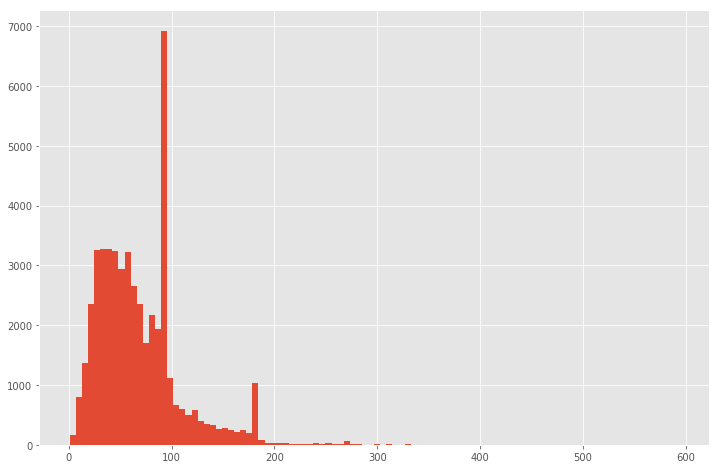

In [29]:
projection = {
    "_id": 0,
    "standard_edge": 1
}
durations = edge_coll.find({}, projection)
duration_lst = [item['standard_edge'] for item in list(durations) if (item['standard_edge'] < 600) and 
               (item['standard_edge'] > 0)]

fig, ax = plt.subplots(figsize=(12, 8))
ax.hist(duration_lst, bins=100);

Last question: What happened with that trip with the crazy long edge?

In [34]:
cray = list(edge_coll.find({'standard_edge': 1789}))[0]

In [42]:
trip_id_iso = '7253699_2016-11-11_4YZQ6'
whoa = list(trip_coll.find({'_id': trip_id_iso}))[0]
whoa['trip_duration']

3824.0

So the trip took 64 minutes.      
And that one edge took 30 minutes, almost half!      
Lets check out edges:

In [44]:
zero_count = 0
for seq, edge in whoa['edges'].items():
    if edge['edge_time'] == 0:
        zero_count += 1 
zero_count

19

19 of it's edges are 0!

When did it run?

In [46]:
dt = datetime.fromtimestamp(whoa['first_timestamp'])
dt.isoformat()

'2016-11-11T10:00:10'

In [48]:
stops = pd.read_csv('sfmta_2017-02-10/stops.txt')
stops.shape

(4639, 7)